In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime as dt
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima

In [25]:
df= pd.read_csv('C://Users//DELL//OneDrive//Desktop//ML//UDEMY_TSA_FINAL/Data/covid_19_india (1).csv')

In [26]:
df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
16377,16378,2021-06-24,8:00 AM,Telangana,-,-,596628,3598,616688
16378,16379,2021-06-24,8:00 AM,Tripura,-,-,58978,660,63499
16379,16380,2021-06-24,8:00 AM,Uttarakhand,-,-,329182,7068,339127
16380,16381,2021-06-24,8:00 AM,Uttar Pradesh,-,-,1678788,22336,1704790


In [27]:
df.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
16377,16378,2021-06-24,8:00 AM,Telangana,-,-,596628,3598,616688
16378,16379,2021-06-24,8:00 AM,Tripura,-,-,58978,660,63499
16379,16380,2021-06-24,8:00 AM,Uttarakhand,-,-,329182,7068,339127
16380,16381,2021-06-24,8:00 AM,Uttar Pradesh,-,-,1678788,22336,1704790
16381,16382,2021-06-24,8:00 AM,West Bengal,-,-,1447510,17475,1487363


In [28]:
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [29]:
df['Date']=pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date',inplace=True)

<AxesSubplot:xlabel='Date'>

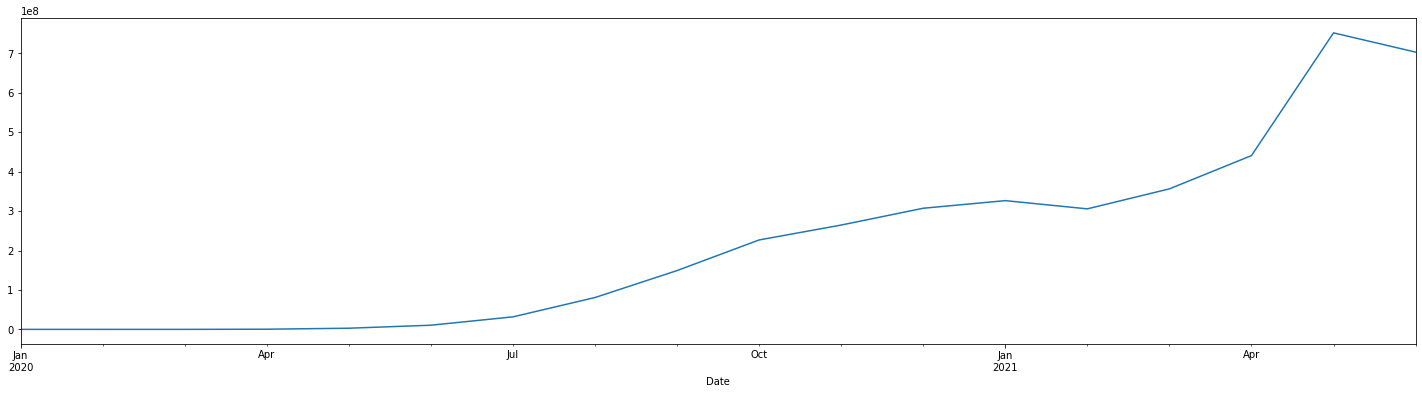

In [30]:
df['Confirmed'].resample(rule ='M').sum().plot(figsize = (25,6))

<AxesSubplot:xlabel='Date'>

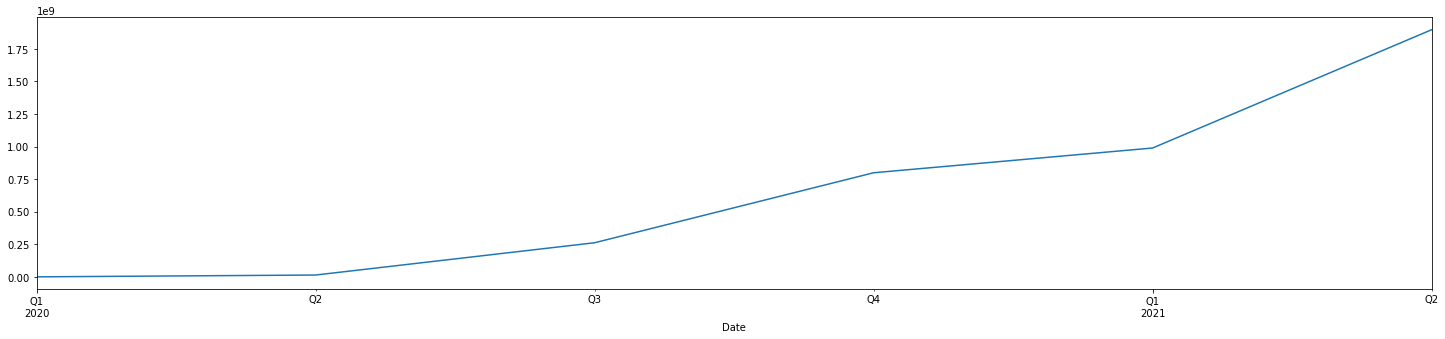

In [31]:
df['Confirmed'].resample(rule = 'Q').sum().plot(figsize =(25,5))

In [32]:
df1=pd.DataFrame()
df1=df.drop(columns=['Sno','Time','ConfirmedIndianNational','State/UnionTerritory','ConfirmedForeignNational','Cured','Deaths'])


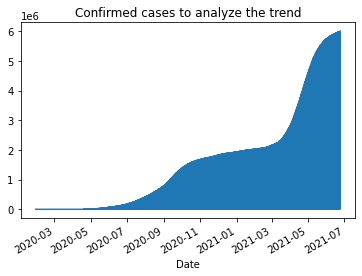

In [33]:
df1['Confirmed'].plot()
plt.title('Confirmed cases to analyze the trend')
plt.show()


In [34]:
df_day = df1.resample('D').sum()

<AxesSubplot:xlabel='Date'>

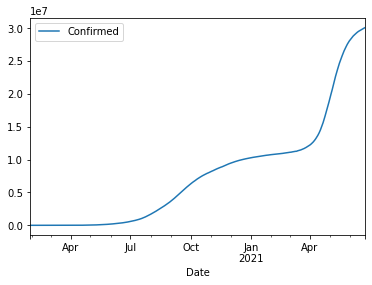

In [35]:
df_day.plot()

In [36]:
df_day.loc['2021-06-24']

Confirmed    30082778
Name: 2021-06-24 00:00:00, dtype: int64

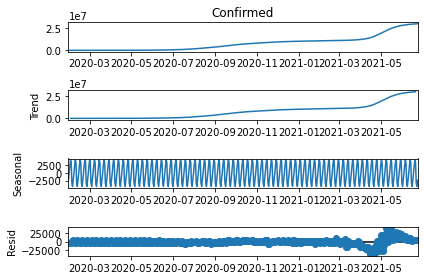

In [42]:
a = seasonal_decompose(df_day['Confirmed']);
a.plot();

In [49]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [51]:
adf_test(df_day['Confirmed'])

Augmented Dickey-Fuller Test: Corona cases 30 days forecast
ADF test statistic        2.046470
p-value                   0.998730
# lags used              17.000000
# observations          494.000000
critical value (1%)      -3.443657
critical value (5%)      -2.867408
critical value (10%)     -2.569896
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


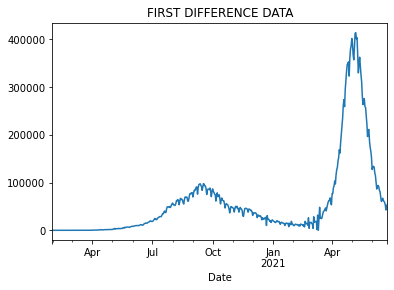

In [52]:
from statsmodels.tsa.statespace.tools import diff
df_day['covid_actual'] = diff(df_day['Confirmed'],k_diff=1)

df_day['covid_actual'].plot(title="FIRST DIFFERENCE DATA").autoscale(axis='x',tight=True);

In [53]:
df_day.to_csv('COVID_MODIFIED.CSV',index = True)

In [54]:
adf_test(df_day['covid_actual'])

Augmented Dickey-Fuller Test: Corona cases 30 days forecast
ADF test statistic       -3.012912
p-value                   0.033706
# lags used              16.000000
# observations          494.000000
critical value (1%)      -3.443657
critical value (5%)      -2.867408
critical value (10%)     -2.569896
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [55]:
train = df_day.iloc[:500]
test = df_day.iloc[500:]

In [56]:
auto_arima(df_day['covid_actual'].dropna(),seasonal=True, m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  511
Model:             SARIMAX(1, 1, 4)x(2, 0, [], 7)   Log Likelihood               -5130.302
Date:                            Tue, 29 Jun 2021   AIC                          10276.604
Time:                                    12:34:14   BIC                          10310.479
Sample:                                         0   HQIC                         10289.885
                                            - 511                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9014      0.017     52.025      0.000       0.867       0.935
ma.L1         -1.2185      0.027    -45.919      0.000      -1.271      -1.167
ma.L2          0.3575      0.033     10.818      0.000       0.293       0.422
ma.L3          0.0193      0.035      0.549      0.583      -0.049       0.088
ma.L4          0.0780      0.027      2.847      0.004       0.024       0.132
ar.S.L7        0.3322      0.023     14.196      0.000       0.286       0.378
ar.S.L14       0.4225      0.025     17.155      0.000       0.374       0.471
sigma2       3.16e+07   5.61e-10   5.63e+16      0.000    3.16e+07    3.16e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              2431.61
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):             265.64   Skew:                            -0.62
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.26e+32. Standard errors may be unstable.
"""

In [57]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
result = SARIMAX(train['covid_actual'], order = (1,1,4), seasonal_order =(2,0,0,7),
               enforce_invertibility = False).fit()

In [58]:
start = len(train)
end  = len(train)+len(test)-1


In [59]:
prediction = result.predict(start,end).rename('SARIMA PREDICTIONS')

<AxesSubplot:xlabel='Date'>

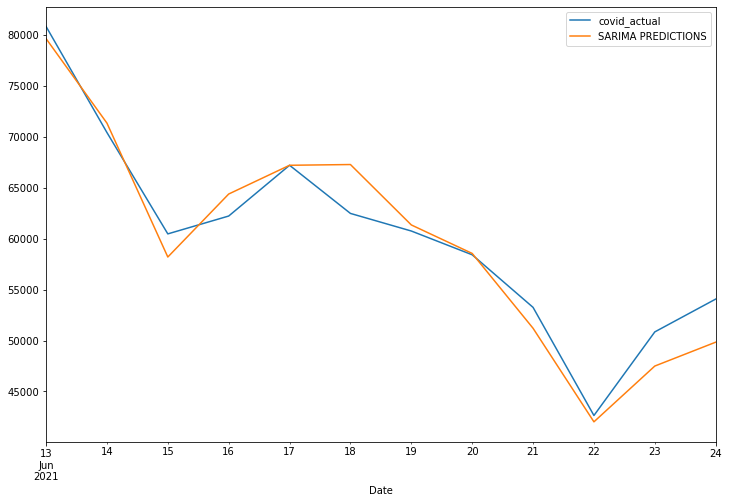

In [60]:
test['covid_actual'].plot(figsize = (12,8),legend = True)
prediction.plot(legend = True)

In [61]:
test['covid_actual'].mean()

60301.916666666664

In [62]:
from statsmodels.tools.eval_measures import rmse
rmse(test['covid_actual'],prediction)

2402.4232921916505

In [63]:
result = SARIMAX(df_day['covid_actual'].dropna(), order = (1,1,4), seasonal_order =(2,0,0,7),
               enforce_invertibility = False).fit()
fcast = result.predict(len(df_day),len(df_day)+30).rename('SARIMA Forecast')

<AxesSubplot:xlabel='Dates', ylabel='No. of daily covid cases'>

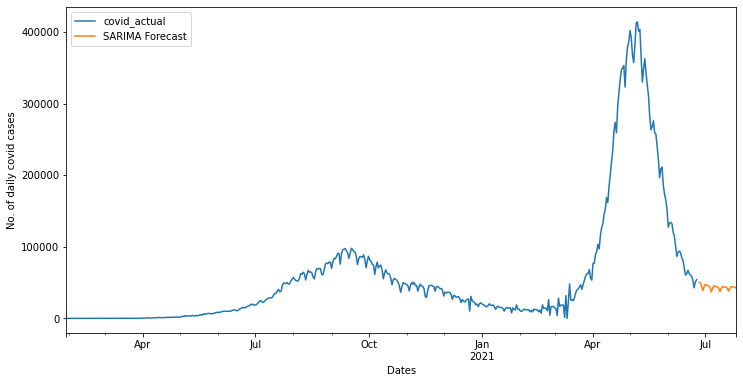

In [64]:
title='Corona cases 30 days forecast'
ylabel='No. of daily covid cases'
xlabel='Dates'

ax = df_day['covid_actual'].plot(legend =True,figsize = (12,6))
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
fcast.plot(legend = True)

In [65]:
a = pd.DataFrame(fcast.values,columns=['predicted daily cases'])
b= pd.read_excel('C://Users//DELL//OneDrive//Desktop//ML//UDEMY_TSA_FINAL/Data/dates.xlsx')

In [66]:
thirty_days_forecast = b.join(a)

In [68]:
thirty_days_forecast

,dates,predicted daily cases
0,2021-06-25,50395.754479
1,2021-06-26,49749.363372
2,2021-06-27,45227.272079
3,2021-06-28,38946.410404
4,2021-06-29,43599.421114
5,2021-06-30,47826.026832
6,2021-07-01,46371.129938
7,2021-07-02,45801.680013
8,2021-07-03,45414.327923
9,2021-07-04,42493.204978


# SARIMA with exogenous variable

In [92]:
covid_test= pd.read_excel('C://Users//DELL//OneDrive//Desktop//ML//UDEMY_TSA_FINAL/Data/covid_tests.xlsx')

In [93]:
covid_test

,Tested On,Tested So Far,New
0,2020-03-13,6500,6500
1,2020-03-18,13125,6625
2,2020-03-19,14175,859
3,2020-03-19,13316,191
4,2020-03-20,15404,1028
...,...,...,...
475,2021-06-24,397832667,1859469
476,2021-06-25,399568448,1735781
477,2021-06-26,401811892,2243444
478,2021-06-27,404265101,2453209


In [95]:
covid_test.isnull().sum()

Tested On        0
Tested So Far    0
New              0
dtype: int64